In [1]:
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

import cv2 as cv

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# normalize our data to make it easier to handle
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten( input_shape =( 28 , 28 )))
model.add(tf.keras.layers.Dense( units = 128 , activation = 'relu' ))
model.add(tf.keras.layers.Dense( units = 128 , activation = 'relu' ))
model.add(tf.keras.layers.Dense( units = 10 , activation =tf.nn.softmax))
model.compile( optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy' , metrics =[ 'accuracy' ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, Y_train, epochs = 3 )

Train on 60000 samples
Epoch 1/3
29760/60000 [=============>................] - ETA: 17:25 - loss: 2.3310 - accuracy: 0.031 - ETA: 1:20 - loss: 2.1429 - accuracy: 0.401 - ETA: 36s - loss: 1.7967 - accuracy: 0.5473 - ETA: 26s - loss: 1.5109 - accuracy: 0.612 - ETA: 19s - loss: 1.2941 - accuracy: 0.649 - ETA: 16s - loss: 1.1508 - accuracy: 0.685 - ETA: 14s - loss: 1.0314 - accuracy: 0.716 - ETA: 13s - loss: 0.9596 - accuracy: 0.733 - ETA: 12s - loss: 0.8963 - accuracy: 0.749 - ETA: 11s - loss: 0.8465 - accuracy: 0.763 - ETA: 10s - loss: 0.7964 - accuracy: 0.775 - ETA: 9s - loss: 0.7637 - accuracy: 0.784 - ETA: 9s - loss: 0.7243 - accuracy: 0.79 - ETA: 8s - loss: 0.6955 - accuracy: 0.80 - ETA: 8s - loss: 0.6721 - accuracy: 0.80 - ETA: 7s - loss: 0.6498 - accuracy: 0.81 - ETA: 7s - loss: 0.6297 - accuracy: 0.82 - ETA: 7s - loss: 0.6093 - accuracy: 0.82 - ETA: 7s - loss: 0.5968 - accuracy: 0.83 - ETA: 7s - loss: 0.5832 - accuracy: 0.83 - ETA: 6s - loss: 0.5700 - accuracy: 0.83 - ETA: 6s - l

limit_output extension: Maximum message size of 10000 exceeded with 10021 characters

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - ETA: 41s - loss: 0.1057 - accuracy: 0.968 - ETA: 2s - loss: 0.1067 - accuracy: 0.967 - ETA: 1s - loss: 0.1325 - accuracy: 0.95 - ETA: 0s - loss: 0.1401 - accuracy: 0.95 - ETA: 0s - loss: 0.1326 - accuracy: 0.95 - ETA: 0s - loss: 0.1264 - accuracy: 0.95 - ETA: 0s - loss: 0.1180 - accuracy: 0.96 - ETA: 0s - loss: 0.1076 - accuracy: 0.96 - ETA: 0s - loss: 0.0985 - accuracy: 0.96 - 1s 59us/sample - loss: 0.0986 - accuracy: 0.9694


In [12]:
print ( 'Loss: ' , loss)
print ( 'Accuracy: ' , accuracy)

Loss:  0.09859699578620493
Accuracy:  0.9694


In [ ]:
model.save("model\digits.model")


In [ ]:

model = tf.keras.models.load_model('digits.model')

In [1]:
image = cv.imread("image/digit1.png")[:,:,0]
image = np.invert(np.array([image]))


NameError: name 'cv' is not defined

In [14]:
prediction = model.predict(image)
print ( "Prediction: {}" .format(np.argmax(prediction)))

Prediction: 6


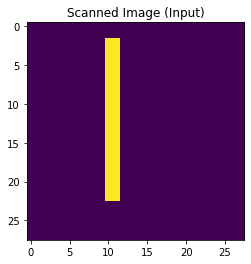

In [15]:
plt.imshow(image[0])
plt.title("Scanned Image (Input)")
plt.show()

In [ ]:
model.save()